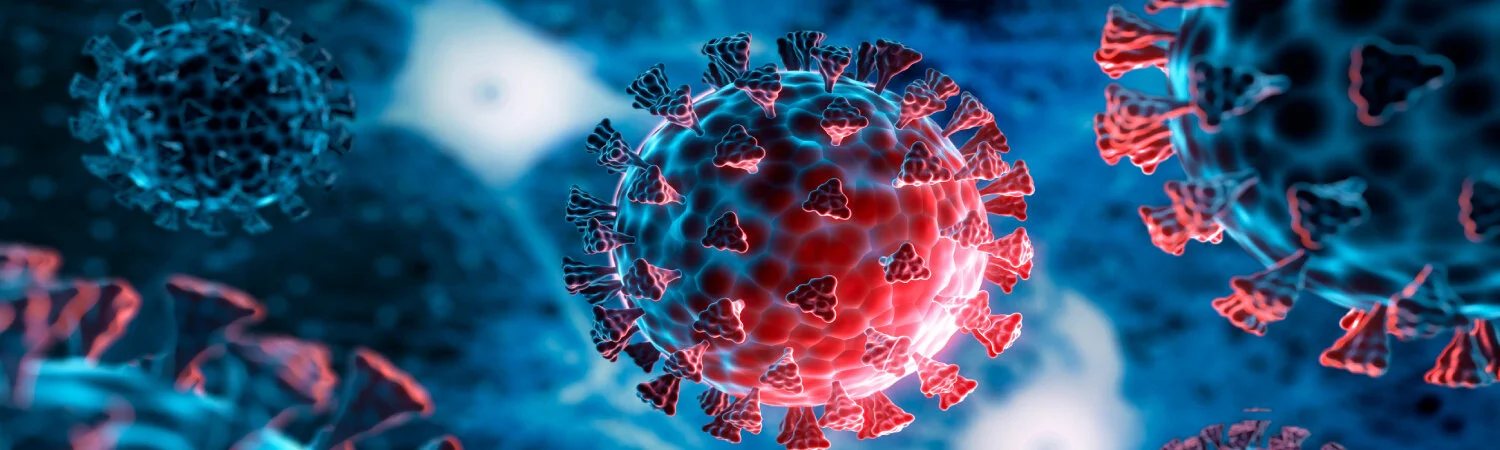

# Reto
##El arte de la analítica

Integrantes:

*   Tania Regina Ramírez Vázquez - A01654087
*   Juan Antonio Mancera Velasco - A01662634
*   Owen Rosales Castro - A01660320

## Importación de librerías

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de datos

In [16]:
df = pd.read_csv("covid19_tweets.csv")
df

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8208,OpenMind eDesign,NOIDA,"Partnering with colleges, universities, and Ed...",2020-05-08 15:04:46,16.0,130.0,0.0,False,2020-07-25 07:11:31,The perfect #SaturdayThought of the week.\n\n#...,"['SaturdayThought', 'quoteoftheweek', 'quotes'...",Twitter Web App,False
8209,Riikka Kevo,Finland,The Future is Here. #Covid19 #Urbanism #Optimi...,2017-02-19 13:09:04,659.0,1611.0,16309.0,False,2020-07-25 07:11:31,⁦@TheLancet Small study of #NeonatalManagemenA...,"['NeonatalManagemenAndOutcomes', 'COVID19']",Twitter for iPhone,False
8210,Covid Tracking India,India,"Covind-19 news, facts, insights & analytics.\n...",2020-04-01 19:33:18,1423.0,321.0,334.0,False,2020-07-25 07:11:28,CDC: One-third of #COVID19 patients who aren't...,['COVID19'],Twitter Web App,False
8211,Daphne Jocelyn Lull,NaN,"Surface Pattern Designer & Zazzler Your ""go to...",2019-01-07 18:09:24,70.0,97.0,6612.0,False,2020-07-25 07:11:21,#COVID19 masks in solidarity with Spain https:...,['COVID19'],Twitter Web App,False


In [ ]:
columns = df.columns
columns

Cálculo de las dimensiones de nuestro data frame.

In [ ]:
df.shape

Calculamos el número de espacios nulos para cada columna.

In [ ]:
df.isnull().sum()

Calculamos el número de datos únicos en cada columna, podemos ver que hay conteos que son inferiores a la cantidad de datos calculada en las dimensiones de nuestro data frame, lo que nos indica que hay datos repetidos.

In [ ]:
df.nunique()

Imprimimos la columna de ubicaciones para calcular las incidencias, sin embargo, podemos observar la existencia de datos que no son ubicaciones reales.

In [ ]:
print (round((df['user_location'].value_counts(normalize=True))*100,2))

# Objetivo 1: Análisis Geográfico

Usamos la importación de geopandas para poder obtener los archivos necesarios para generar un mapa.

1. Creamos un filtro para seleccionar los países que tienen presencia en el data frame. (En el proceso se descartan las ubicaciones que no sean de algún sitio real)
2. Posteriormente se hace un conteo de cada incidencia por país.
3. Usando el número de incidencias por país se genera el mapa usando una escala de color para representar el número de incidencias por cada nación.

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Cargar el archivo de fronteras de países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Conjunto de países únicos con presencia
paises_con_presencia = df['user_location'].dropna().unique()

# Número de incidencias por país
num_incidencias = df['user_location'].value_counts().reset_index()
num_incidencias.columns = ['name', 'num_incidencias']

# Unir el número de incidencias al DataFrame world
world = world.merge(num_incidencias, on='name', how='left')
world['num_incidencias'].fillna(0, inplace=True)

# Dibujar mapa
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, color='gray', linewidth=0.5)
world[world['num_incidencias'] > 0].plot(column='num_incidencias', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Número de Incidencias"})
plt.title('Ubicación de los usuarios')
plt.show()

Podemos observar la nueva variable de incidencias y nombre de países filtrada y observar la cantidad de tweets generados en cada una.

In [ ]:
df_sorted = world.sort_values(by='num_incidencias', ascending=False)
print(df_sorted[['name','num_incidencias']])

#Objetivo 2: Análisis de Temas y Palabras Clave

Para esta parte se usa la librería contractions para poder hacer un análisis de los tweets y filtrar la información relevante.

In [24]:
pip install contractions

In [26]:
import contractions

#Proceso de formateo al texto
df['processed'] = df['text'].replace(r'http\S+', ' ', regex=True)         # Remover direcciones web o urls
df['processed'] = df['processed'].str.upper()                             # Convertir texto a mayúsculas
df['processed'] = df['processed'].apply(contractions.fix)                 # Eliminar contracciones dentro del texto
df['processed'] = df['processed'].apply(lambda x:[t for t in x.split() if not t.startswith('@')]).apply(lambda x: ' '.join(x)) # Eliminar tags a otras personas
df['processed'] = df['processed'].replace(r'[^A-Za-z]+', ' ', regex=True) # Analizar las expresiones regulares
df['processed'] = df['processed'].apply(lambda x: x.strip())              # Eliminar espacios innecesarios

AttributeError: ignored

Resultado final de los tweets filtrados:

In [21]:
print(df['processed'])

0       IF I SMELLED THE SCENT OF HAND SANITIZERS TODA...
1       HEY @YANKEES @YANKEESPR AND @MLB - WOULDN'T IT...
2       @DIANE3443 @WDUNLAP @REALDONALDTRUMP TRUMP NEV...
3       @BROOKBANKTV THE ONE GIFT #COVID19 HAS GIVE ME...
4       25 JULY : MEDIA BULLETIN ON NOVEL #CORONAVIRUS...
                              ...                        
8208    THE PERFECT #SATURDAYTHOUGHT OF THE WEEK.\n\n#...
8209    ⁦@THELANCET SMALL STUDY OF #NEONATALMANAGEMENA...
8210    CDC: ONE-THIRD OF #COVID19 PATIENTS WHO AREN'T...
8211          #COVID19 MASKS IN SOLIDARITY WITH SPAIN    
8212                                                  NaN
Name: processed, Length: 8213, dtype: object


Importación de librería para formar una nube de palabras con las palabras más comunes dentro de los tweets.

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
text_list = [review for review in df['processed']]
text = " ".join(text_list)

stopwords = set(STOPWORDS)
# Definición de palabras que no sean tomadas para la nube
stopwords.update(['WILL', 'SAY', 'STILL', 'AMP', 'HTTPS', 'COVID19HTTPS', "GOING", "READ", "MANY", "EVEN", "SAYS", "LOOK", "KNOW", "THINK"])
# Impresión del wordcloud
wordcloud = WordCloud(stopwords=stopwords,background_color="white", min_word_length=4, collocation_threshold=20).generate(text)
plt.figure(figsize = (15,20))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

#Objetivo 3: Análisis de Hashtags y Tendencias Destacadas

#Frecuencia de Tweets por fecha

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo CSV en un DataFrame
df = pd.read_csv('covid19_tweets.csv')

# Asegúrate de tener una columna 'fecha' en formato datetime
df['fecha'] = pd.to_datetime(df['date'])

# Añade una nueva columna 'fecha_sin_hora' que contiene solo la fecha
df['fecha_sin_hora'] = df['fecha'].dt.date

# Agrupa los datos por 'fecha_sin_hora' y cuenta el número de tweets en cada grupo
frecuencia_tweets_por_fecha = df.groupby('fecha_sin_hora').size().reset_index(name='frecuencia')

# La variable 'frecuencia_tweets_por_fecha' ahora contiene la frecuencia de tweets por fecha

# Grafica la frecuencia de tweets por fecha
plt.figure(figsize=(12, 6))
plt.plot(frecuencia_tweets_por_fecha['fecha_sin_hora'], frecuencia_tweets_por_fecha['frecuencia'], marker='o', linestyle='-')
plt.title('Frecuencia de Tweets por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mayor legibilidad
plt.grid(True)

# Agrega etiquetas de datos (número de tweets) en cada punto
for i, row in frecuencia_tweets_por_fecha.iterrows():
    plt.annotate(f'{row["frecuencia"]}', (row['fecha_sin_hora'], row['frecuencia']), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()

#Análisis de hashtag por fecha


* 25 JULIO 2020


In [ ]:
import re

#Análisis del día
dia_interes = '2020-07-25'

#Solo tweets del día de interés
tweets_dia_interes = df[df['fecha'].dt.date == pd.to_datetime(dia_interes).date()]

#Extracción de hashtags
hashtags = []
for tweet in tweets_dia_interes['text']:
    hashtags.extend(re.findall(r'#\w+', tweet))

#Frecuencia de hashtags
frecuencia_hashtags = pd.Series(hashtags).value_counts().reset_index()
frecuencia_hashtags.columns = ['hashtag', 'frecuencia']

#Sort by frecuencia
frecuencia_hashtags = frecuencia_hashtags.sort_values(by='frecuencia', ascending=False)

#los 30 Hashtags más frecuentes
print(frecuencia_hashtags.head(30))

* 04 AGOSTO 2020

In [ ]:
#Análisis del día
dia_interes = '2020-08-04'

#Solo tweets del día de interés
tweets_dia_interes = df[df['fecha'].dt.date == pd.to_datetime(dia_interes).date()]

#Extracción de hashtags
hashtags = []
for tweet in tweets_dia_interes['text']:
    hashtags.extend(re.findall(r'#\w+', tweet))

#Frecuencia de hashtags
frecuencia_hashtags = pd.Series(hashtags).value_counts().reset_index()
frecuencia_hashtags.columns = ['hashtag', 'frecuencia']

#Sort by frecuencia
frecuencia_hashtags = frecuencia_hashtags.sort_values(by='frecuencia', ascending=False)

#los 30 Hashtags más frecuentes
print(frecuencia_hashtags.head(30))

#Menciones de 'India' en los Tweets por día

In [ ]:


# Define la expresión regular para buscar menciones de "India" (insensible a mayúsculas/minúsculas)
expresion_regular = r'\bIndia\b'

# Inicializa un diccionario para almacenar los resultados por día
resultados_por_dia = {'fecha': [], 'contador_india': []}

# Itera a través de los datos y cuenta las menciones de "India" por día
for fecha, grupo in df.groupby(df['fecha'].dt.date):
    contador_india = 0
    for texto in grupo['text']:
        menciones_india = re.findall(expresion_regular, texto, flags=re.IGNORECASE)
        contador_india += len(menciones_india)
    resultados_por_dia['fecha'].append(fecha)
    resultados_por_dia['contador_india'].append(contador_india)

# Crea un DataFrame de resumen
resumen = pd.DataFrame(resultados_por_dia)

# Grafica el número de menciones de "India" por día
plt.figure(figsize=(12, 6))
plt.plot(resumen['fecha'], resumen['contador_india'], marker='o', linestyle='-')
plt.title('Menciones de "India" por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Menciones')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# Subtabla: Tweets sobre India del día 08 AGOSTO 2020


In [ ]:
# Define la fecha de interés (por ejemplo, '2020-07-25')
fecha_interes = '2020-08-04'

# Filtra los tweets que mencionan "India" en la fecha de interés
tweets_interes = df[(df['fecha'].dt.date == pd.to_datetime(fecha_interes).date()) & (df['text'].str.contains('India', case=False))]

tweets_interes

#Segmentación de usuarios tomando en cuenta la subtabla: Seguidores vs Amigos

In [ ]:
from sklearn.cluster import KMeans

# Preparar datos para clustering
X = tweets_interes[['user_followers', 'user_friends']]

# Crear y entrenar el modelo de K-Means
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Obtener las etiquetas de los clusters para cada usuario
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
tweets_interes['cluster'] = labels

# Visualizar los clusters
plt.scatter(tweets_interes['user_followers'], tweets_interes['user_friends'], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red', label='Centroides')

plt.xlabel('Seguidores')
plt.ylabel('Amigos')
plt.title('Segmentación de Usuarios')
plt.show()